<span style='color:Blue ;
             font-size:30px;'>
    Machine Learning assignment №1.  </span><br>
<span style='color:Red ;
             font-size:15px;'>
    Student : Amir Zakirov.  </span><br>

#### Loading libraries

In [247]:
import pandas as pd
from pandas_profiling import ProfileReport
from category_encoders import BaseNEncoder
import matplotlib.pylab as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures , StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso,Ridge,LinearRegression,LogisticRegression
from sklearn import metrics
from sklearn.pipeline import Pipeline,make_pipeline

from imblearn.over_sampling import SMOTE  

## Part 1.Regression task 

<span style='color:Blue ;
             font-size:20px;'>
    1)Data preprocessing and visualization.  </span><br>

In [248]:
Train_df = pd.read_csv('./bitrate_train.csv', low_memory=False)
Test_df = pd.read_csv('./bitrate_test.csv', low_memory=False)
Train_df.head(5)

,fps_mean,fps_std,rtt_mean,rtt_std,dropped_frames_mean,dropped_frames_std,dropped_frames_max,bitrate_mean,bitrate_std,target
0,24.4,0.516398,91.1,6.723921,0.0,0.0,0.0,460.5,7.648529,616.0
1,28.6,2.065591,99.7,15.923777,0.0,0.0,0.0,616.3,155.414893,565.0
2,30.0,0.000000,98.1,11.798776,0.0,0.0,0.0,565.2,9.077445,573.0
3,30.3,0.948683,99.4,13.014522,0.0,0.0,0.0,573.8,28.350191,585.0
4,29.9,0.316228,123.2,62.476307,0.0,0.0,0.0,585.8,59.458295,555.0


#### Creating the report

In [249]:
# from pandas_profiling import ProfileReport

# report = ProfileReport(Train_df)
# report.to_file('bitrate_prediction.html')

#### Encode the data (If cathegorical features are exist)

In [250]:
#Show type of variables in each feature
print("Types of data in each feature:")
print(Train_df.dtypes)
print("\n")
cat_feats = Train_df.select_dtypes(include=['object']).columns.tolist()
if len(cat_feats)==0:
    encoded_data = Train_df
    test_encoded_data = Test_df
    print("Dataset doesn't need to be encoded")
else:
    #Create an object for Base N Encoding
    encoder= BaseNEncoder(cols=cat_feats,return_df=True,base=5)
    # Fit to train data
    encoder.fit(Train_df)
    # Transform
    encoded_data = encoder.transform(Train_df)
    test_encoded_data = encoder.transform(Test_df)
    # Show
    print("First 5 rows in dataset after encoding:")
    display(encoded_data.head(5))

Types of data in each feature:
fps_mean               float64
fps_std                float64
rtt_mean               float64
rtt_std                float64
dropped_frames_mean    float64
dropped_frames_std     float64
dropped_frames_max     float64
bitrate_mean           float64
bitrate_std            float64
target                 float64
dtype: object


Dataset doesn't need to be encoded


#### Select the target feature

In [251]:
X_train = encoded_data.drop(['target'],axis=1)
y_train = encoded_data['target']
X_test = test_encoded_data.drop(['target'],axis=1)
y_test = test_encoded_data['target']
target = 'target'
print("Train data after separating target feature from all dataset:")
X_train

Train data after separating target feature from all dataset:


,fps_mean,fps_std,rtt_mean,rtt_std,dropped_frames_mean,dropped_frames_std,dropped_frames_max,bitrate_mean,bitrate_std
0,24.4,0.516398,91.1,6.723921,0.0,0.0,0.0,460.5,7.648529
1,28.6,2.065591,99.7,15.923777,0.0,0.0,0.0,616.3,155.414893
2,30.0,0.000000,98.1,11.798776,0.0,0.0,0.0,565.2,9.077445
3,30.3,0.948683,99.4,13.014522,0.0,0.0,0.0,573.8,28.350191
4,29.9,0.316228,123.2,62.476307,0.0,0.0,0.0,585.8,59.458295
...,...,...,...,...,...,...,...,...,...
379016,40.0,0.000000,0.0,0.000000,0.0,0.0,0.0,3324.9,52.846633
379017,40.0,0.000000,0.0,0.000000,0.0,0.0,0.0,3325.3,66.015234
379018,40.0,0.000000,0.0,0.000000,0.0,0.0,0.0,3293.2,43.355892
379019,40.0,0.000000,0.0,0.000000,0.0,0.0,0.0,3317.0,40.033319


#### Scale train and test data

In [252]:
scaler = MinMaxScaler().fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

#### Visualizing data with scatter plot

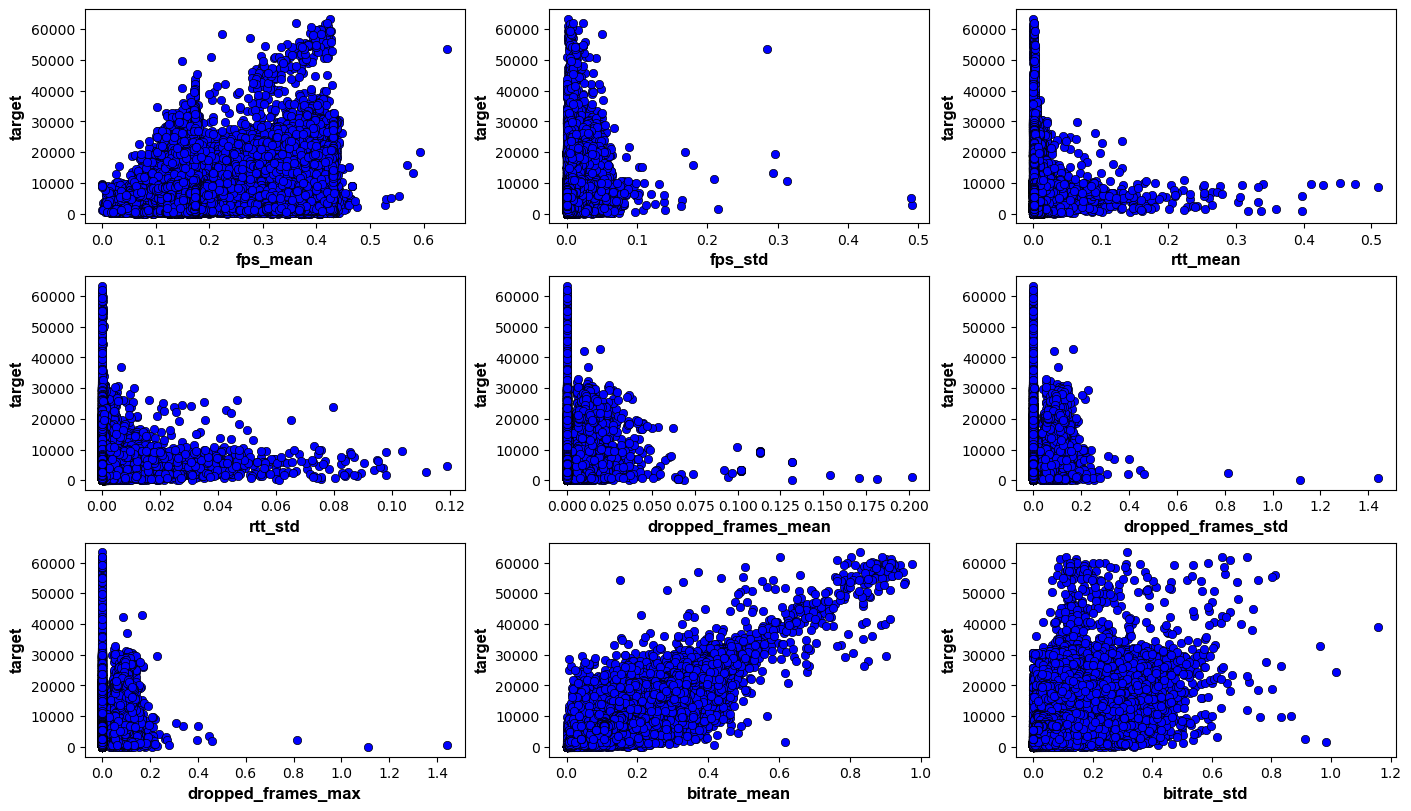

In [253]:
fig, axs = plt.subplots(3, 3 , constrained_layout = True, figsize=(14, 8))
csfont = {'fontname' : 'Arial' , 'size' : 12 , 'weight' : 'bold'}
k=0
for i in range(3):
    for j in range(3):
        feature_name = X_test.columns[k]
        axs[i,j].scatter(X_test[feature_name] , y_test , color = "blue", edgecolors = "black", linewidths = 0.5, alpha = 1)
        axs[i,j].set_xlabel(feature_name,**csfont)
        axs[i,j].set_ylabel('target',**csfont)
        k+=1

#### Creation of correlation matrix

In [254]:
corr = Train_df.corr()

corr.style.background_gradient()

,fps_mean,fps_std,rtt_mean,rtt_std,dropped_frames_mean,dropped_frames_std,dropped_frames_max,bitrate_mean,bitrate_std,target
fps_mean,1.000000,0.291948,0.011289,0.001031,0.044425,0.092878,0.091633,0.206712,0.188536,0.200776
fps_std,0.291948,1.000000,0.129675,0.164740,0.282754,0.434746,0.427756,0.061789,0.273015,0.066968
rtt_mean,0.011289,0.129675,1.000000,0.702911,0.044444,0.056574,0.057321,-0.098277,-0.049614,-0.100062
rtt_std,0.001031,0.164740,0.702911,1.000000,0.052445,0.077439,0.076753,-0.028699,0.000090,-0.030873
dropped_frames_mean,0.044425,0.282754,0.044444,0.052445,1.000000,0.699134,0.728488,0.034281,0.046132,0.032600
dropped_frames_std,0.092878,0.434746,0.056574,0.077439,0.699134,1.000000,0.991314,0.046899,0.076906,0.044341
dropped_frames_max,0.091633,0.427756,0.057321,0.076753,0.728488,0.991314,1.000000,0.047659,0.075047,0.045194
bitrate_mean,0.206712,0.061789,-0.098277,-0.028699,0.034281,0.046899,0.047659,1.000000,0.522786,0.945077
bitrate_std,0.188536,0.273015,-0.049614,0.000090,0.046132,0.076906,0.075047,0.522786,1.000000,0.519452
target,0.200776,0.066968,-0.100062,-0.030873,0.032600,0.044341,0.045194,0.945077,0.519452,1.000000


<span style='color:Blue ;
             font-size:20px;'>
    2)Feature selection and engineering: Selection of best data features  </span><br>

#### Feature selection using L1 regularization / Lasso

In [255]:
%matplotlib inline
alphas = [1e-3,0.01,0.1,0.2,0.3,0.5,1.0,1.5,2.0,3.0,5.0]
Feat_names = list(X_train.columns.values)

def lasso(alphas):
    """
    Function that returns Dataframe with Lasso coefficients for X features
    """
    df = pd.DataFrame()
    df['Feature Name'] = Feat_names
    for alpha in alphas:
        lasso = Lasso(alpha=alpha)
        lasso.fit(X_train, y_train)
        column_name = 'Alpha = %f' % alpha
        df[column_name] = lasso.coef_
    return df

L1_coef_df = lasso(alphas)
L1_coef_df.head(10)

,Feature Name,Alpha = 0.001000,Alpha = 0.010000,Alpha = 0.100000,Alpha = 0.200000,Alpha = 0.300000,Alpha = 0.500000,Alpha = 1.000000,Alpha = 1.500000,Alpha = 2.000000,Alpha = 3.000000,Alpha = 5.000000
0,fps_mean,182.184416,181.994029,182.217447,165.956146,153.146989,135.219618,95.019214,54.814118,14.571842,0.000000,0.000000
1,fps_std,1041.504050,842.443599,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,rtt_mean,-7099.012505,-6115.078591,-4228.777934,-2398.281283,-537.215241,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
3,rtt_std,3535.327756,583.400830,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
4,dropped_frames_mean,680.910538,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
5,dropped_frames_std,-4995.812487,-1088.050243,-252.228539,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
6,dropped_frames_max,4203.585798,327.075954,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
7,bitrate_mean,60062.345332,60065.929763,60067.888724,60080.785051,60093.547232,60093.948008,60081.496344,60069.054841,60056.703296,60022.088835,59948.038490
8,bitrate_std,3257.704424,3262.360568,3269.008610,3244.944186,3224.924453,3183.796668,3082.321069,2980.839009,2879.298534,2665.383482,2233.098822


In [256]:
"""
Using the Data frame obtained above, we can select the appropriate alpha value 
to create a list containing the name of features for which lasso coefficients are not equal to 0
"""
Alpha = 0.3
Model_selection = Lasso(alpha=Alpha)
Model_selection.fit(X_train,y_train)
importance = np.abs(Model_selection.coef_)

Important_features = np.array(Feat_names)[importance > 0]

#Remove 'bitrate_mean'&'bitrate_std' from the list of importante feature
remove_index = []
for i in range(len(Important_features)):
    element = Important_features[i]
    if element in ['bitrate_mean','bitrate_std']:
        remove_index.append(i)
Important_features = np.delete(Important_features,remove_index)
print("Features that will used as predictor variables:")
print(Important_features)

Features that will used as predictor variables:
['fps_mean' 'rtt_mean']


<span style='color:Blue ;
             font-size:20px;'>
    3)Regression task  </span><br>

In [257]:
def metrics_fun(method,feature):
    """
    Function for calulating metrics.Takes as argument one of regression method 
    and name of feature that method will execute.
    Result is Dataframe contains MSE, MAE and r2_score for Train and Test data.
    """
    #For test dataset
    y_pred_test = method.predict(X_test[feature].values.reshape(-1,1))
    MSE = metrics.mean_squared_error(y_test , y_pred_test)
    MAE = metrics.mean_absolute_error(y_test , y_pred_test)
    r2_score = metrics.r2_score(y_test , y_pred_test)
    Test_metrics = [MSE,MAE,r2_score]
    #For train dataset
    y_pred_train = method.predict(X_train[feature].values.reshape(-1,1))
    MSE = metrics.mean_squared_error(y_train , y_pred_train)
    MAE = metrics.mean_absolute_error(y_train , y_pred_train)
    r2_score = metrics.r2_score(y_train , y_pred_train)
    Train_metrics = [MSE,MAE,r2_score]
    
    #Create a dataframe
    d = {'Train_set' : Train_metrics , 'Test_set' : Test_metrics}
    Df = pd.DataFrame(data=d, index=["MSE", "MAE", "r2_score"])
    return Df

#### 1.Linear regression

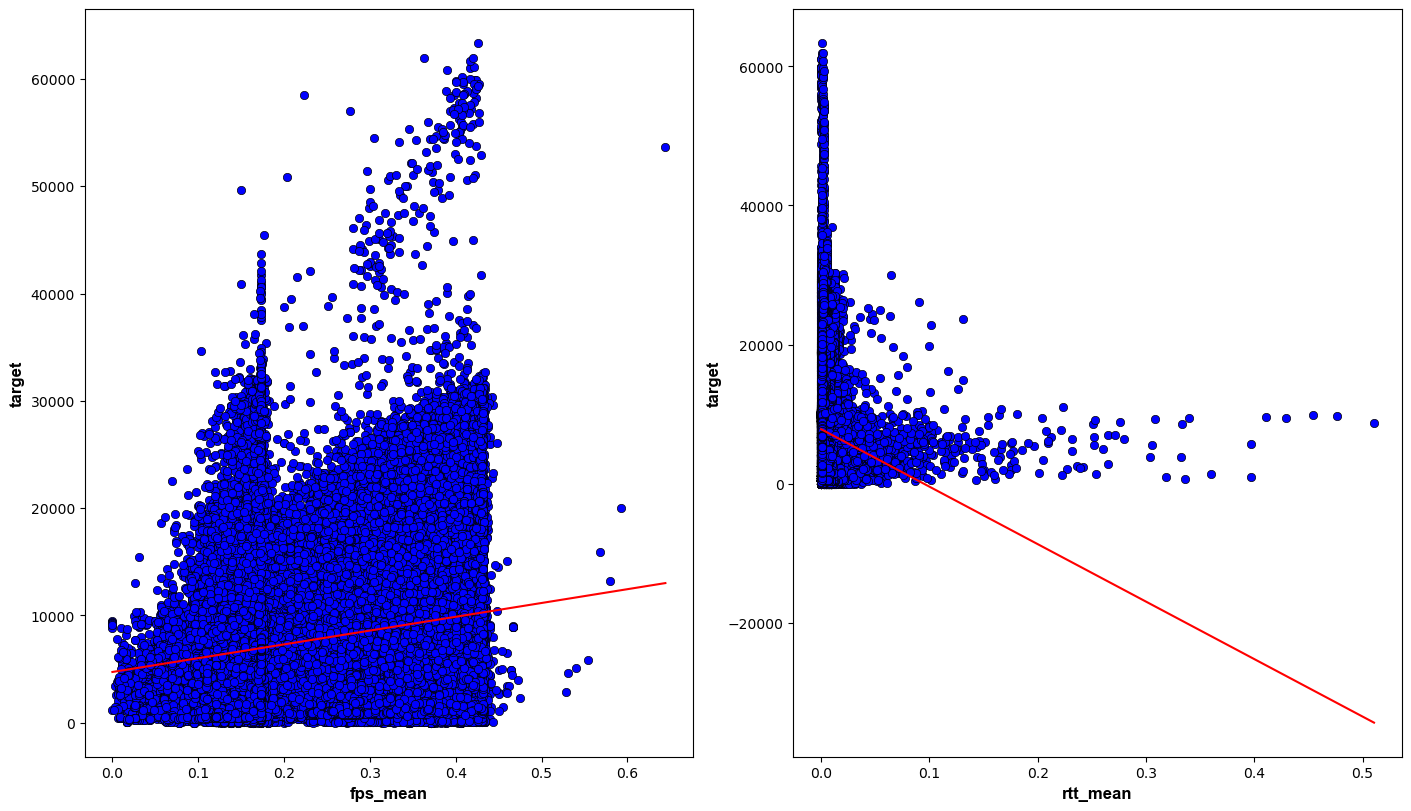

In [258]:
for i in range(len(Important_features)):
    
    if i % 2 == 0:
        fig, axs = plt.subplots(1, 2, constrained_layout = True, figsize=(14, 8))
        i1 = 0 
        
    feature = Important_features[i]
    Single_regressor = LinearRegression()
    Single_regressor.fit(X_train[feature].values.reshape(-1,1), y_train)

    X = np.linspace(X_test[feature].min(),X_test[feature].max(), 50)
    y_X = Single_regressor.predict(X.reshape(-1, 1))
            
    axs[i1].scatter(X_test[feature] , y_test , label="real", color = "blue", edgecolors = "black", linewidths = 0.5, alpha = 1)
    axs[i1].plot(X , y_X , color = 'red' , label="predicted")
    axs[i1].set_xlabel(feature,**csfont)
    axs[i1].set_ylabel('target',**csfont)   
    i1+=1

#### Metrics:

In [259]:
for i in range(len(Important_features)):
    
    feature = Important_features[i]
    Single_regressor = LinearRegression()
    Single_regressor.fit(X_train[feature].values.reshape(-1,1), y_train)  
    print('feature name: ' + '\033[1m' + feature + '\033[0m')
    y_pred = metrics_fun(Single_regressor,feature)
    display(y_pred)
    print("\n")
    

feature name: fps_mean


,Train_set,Test_set
MSE,3.536908e+07,3.434985e+07
MAE,4.669036e+03,4.553654e+03
r2_score,4.031093e-02,3.675830e-02




feature name: rtt_mean


,Train_set,Test_set
MSE,3.648572e+07,3.535975e+07
MAE,4.704320e+03,4.518903e+03
r2_score,1.001244e-02,8.438622e-03


#### 2.Polynomial regression

In [260]:
def best_pol_degree(degree_list):
    """
    A function that returns the degree of the polynomial with the best MSE value
    """
    Degree_array = np.zeros((len(degree_list),len(Important_features)),dtype = np.float32)
    MSE_array = np.linspace(0,0,len(degree_list)).astype(np.float32)
    for i in range(len(Important_features)):
        feature = Important_features[i]
        for d in range(len(degree_list)):
            degree_v = degree_list[d]
            feature = Important_features[i]
            polynomial_features = PolynomialFeatures(degree=degree_v)
            linear_regression = LinearRegression()
            pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("linear_regression", linear_regression)])
            pipeline.fit(X_train[feature].values.reshape(-1,1), y_train)
            y_pred_test = pipeline.predict(X_test[feature].values.reshape(-1,1))
            MSE = metrics.mean_squared_error(y_test , y_pred_test)
            MSE_array[d] += MSE**2
    degree0 = np.argmin(MSE_array)
    return degree0

In [261]:
#Find the apropriate degree of polynomial from 2 to 9
degree_list = [i for i in range(2,9)]
degree0 = best_pol_degree(degree_list)
print("The apropriate degree of the polynomial is equal to :",degree0)

The apropriate degree of the polynomial is equal to : 6


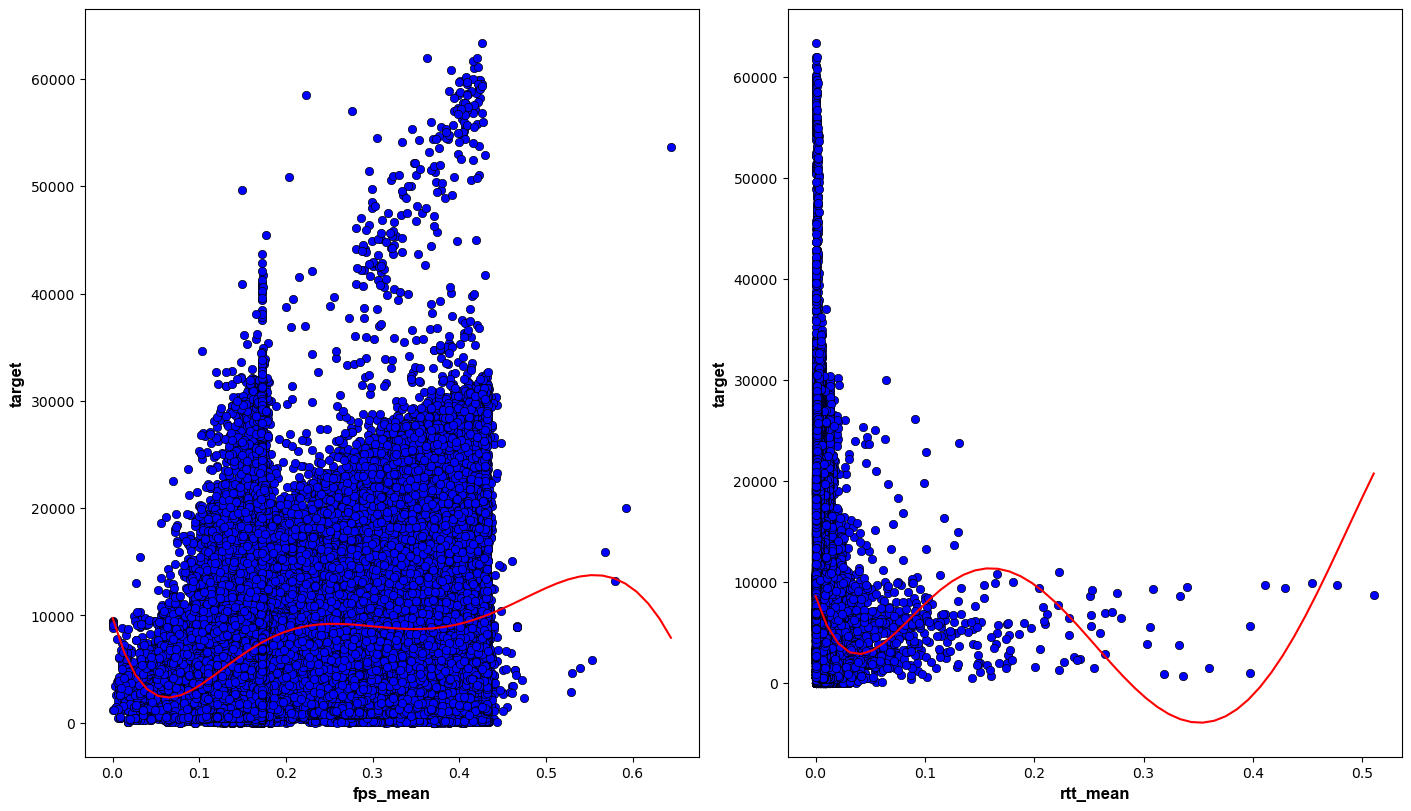

In [262]:
for i in range(len(Important_features)):
    
    if i % 2 == 0:
        fig, axs = plt.subplots(1, 2, constrained_layout = True, figsize=(14, 8))
        i1 = 0 
    
    feature = Important_features[i]
    polynomial_features = PolynomialFeatures(degree=degree0)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X_train[feature].values.reshape(-1,1), y_train)

    X = np.linspace(X_test[feature].min(),X_test[feature].max(), 50)
    y_X = pipeline.predict(X.reshape(-1, 1))
            
    axs[i1].scatter(X_test[feature] , y_test , label="real", color = "blue", edgecolors = "black", linewidths = 0.5, alpha = 1)
    axs[i1].plot(X , y_X , color = 'red' , label="predicted")
    axs[i1].set_xlabel(feature,**csfont)
    axs[i1].set_ylabel('target',**csfont)   
    i1+=1

#### Metrics

In [263]:
for i in range(len(Important_features)):
    
    feature = Important_features[i]
    polynomial_features = PolynomialFeatures(degree=degree0)
    
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X_train[feature].values.reshape(-1,1), y_train)
    
    print("\n")
    print('feature name: ' + '\033[1m' + feature + '\033[0m')
    y_pred = metrics_fun(pipeline,feature)  
    display(y_pred)



feature name: fps_mean


,Train_set,Test_set
MSE,3.468328e+07,3.409956e+07
MAE,4.596075e+03,4.500490e+03
r2_score,5.891920e-02,4.377701e-02




feature name: rtt_mean


,Train_set,Test_set
MSE,3.582374e+07,3.453712e+07
MAE,4.633210e+03,4.441392e+03
r2_score,2.797447e-02,3.150695e-02


#### 3.Lasso

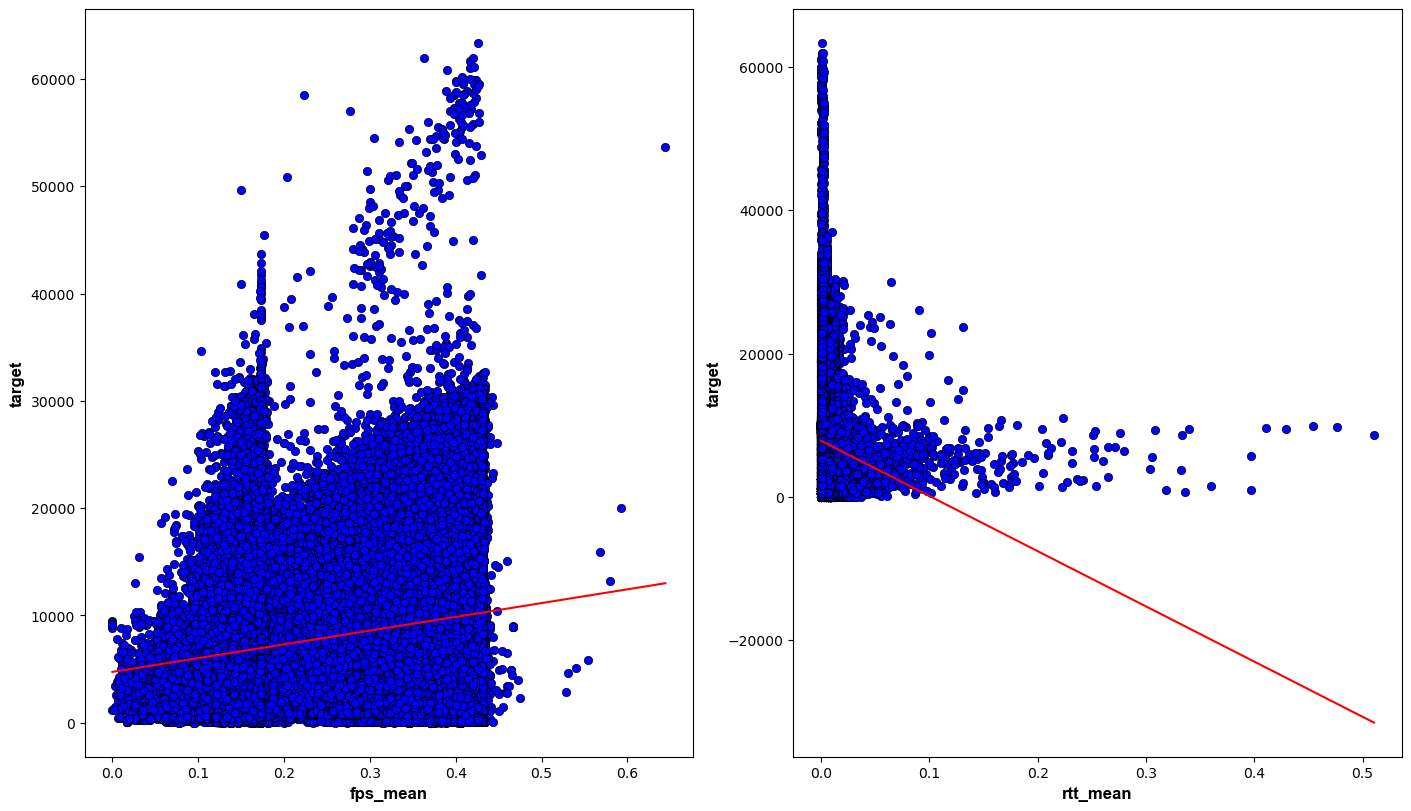

In [264]:
for i in range(len(Important_features)):
    
    if i % 2 == 0:
        fig, axs = plt.subplots(1, 2, constrained_layout = True, figsize=(14, 8))
        i1 = 0 
    
    feature = Important_features[i]
    Lasso_model = Lasso(alpha=Alpha)
    Lasso_model.fit(X_train[feature].values.reshape(-1,1), y_train)

    X = np.linspace(X_test[feature].min(),X_test[feature].max(), 50)
    y_X = Lasso_model.predict(X.reshape(-1, 1))
            
    axs[i1].scatter(X_test[feature] , y_test , label="real", color = "blue", edgecolors = "black", linewidths = 0.5, alpha = 1)
    axs[i1].plot(X , y_X , color = 'red' , label="predicted")
    axs[i1].set_xlabel(feature,**csfont)
    axs[i1].set_ylabel('target',**csfont)   
    i1+=1



#### Metrics

In [265]:
for i in range(len(Important_features)):
    
    feature = Important_features[i]
    Lasso_model = Lasso(alpha=Alpha)
    Lasso_model.fit(X_train[feature].values.reshape(-1,1), y_train)
    
    print("\n")
    print('feature name: ' + '\033[1m' + feature + '\033[0m')
    y_pred = metrics_fun(pipeline,feature)  
    display(y_pred)



feature name: fps_mean


,Train_set,Test_set
MSE,7.894595e+07,7.661500e+07
MAE,7.081008e+03,6.724414e+03
r2_score,-1.142085e+00,-1.148445e+00




feature name: rtt_mean


,Train_set,Test_set
MSE,3.582374e+07,3.453712e+07
MAE,4.633210e+03,4.441392e+03
r2_score,2.797447e-02,3.150695e-02


## Part 2. Classfication task 

<span style='color:Blue ;
             font-size:20px;'>
    1)Data preprocessing and visualization.  </span><br>

In [266]:
Train_df = pd.read_csv('./train_data.csv', low_memory=False)
Test_df = pd.read_csv('./test_data.csv', low_memory=False)
Train_df.head(5)

,fps_mean,fps_std,fps_lags,rtt_mean,rtt_std,dropped_frames_mean,dropped_frames_std,dropped_frames_max,auto_bitrate_state,auto_fec_state,auto_fec_mean,stream_quality
0,24.4,0.516398,0,91.1,6.723921,0.0,0.0,0.0,off,partial,50.0,0
1,28.6,2.065591,0,99.7,15.923777,0.0,0.0,0.0,off,partial,50.0,0
2,30.0,0.000000,0,98.1,11.798776,0.0,0.0,0.0,off,partial,50.0,0
3,30.3,0.948683,0,99.4,13.014522,0.0,0.0,0.0,off,partial,50.0,0
4,29.9,0.316228,0,123.2,62.476307,0.0,0.0,0.0,off,partial,50.0,0


#### Creating the report

In [267]:
# from pandas_profiling import ProfileReport

# report = ProfileReport(Train_df)
# report.to_file('stream_quality_data.html')

#### Encode the data (If cathegorical features are exist)

In [268]:
#Show type of variables in each feature
print("Types of data in each feature:")
print(Train_df.dtypes)
print("\n")
cat_feats = Train_df.select_dtypes(include=['object']).columns.tolist()
if len(cat_feats)==0:
    encoded_data = Train_df
    test_encoded_data = Test_df
    print("Dataset doesn't need to be encoded")
else:
    #Create an object for Base N Encoding
    encoder= BaseNEncoder(cols=cat_feats,return_df=True,base=5)
    # Fit to train data
    encoder.fit(Train_df)
    # Transform
    encoded_data = encoder.transform(Train_df)
    test_encoded_data = encoder.transform(Test_df)
    # Show
    print("First 5 rows in dataset after encoding:")
    display(encoded_data.head(5))

Types of data in each feature:
fps_mean               float64
fps_std                float64
fps_lags                 int64
rtt_mean               float64
rtt_std                float64
dropped_frames_mean    float64
dropped_frames_std     float64
dropped_frames_max     float64
auto_bitrate_state      object
auto_fec_state          object
auto_fec_mean          float64
stream_quality           int64
dtype: object


First 5 rows in dataset after encoding:


,fps_mean,fps_std,fps_lags,rtt_mean,rtt_std,dropped_frames_mean,dropped_frames_std,dropped_frames_max,auto_bitrate_state_0,auto_fec_state_0,auto_fec_mean,stream_quality
0,24.4,0.516398,0,91.1,6.723921,0.0,0.0,0.0,1,1,50.0,0
1,28.6,2.065591,0,99.7,15.923777,0.0,0.0,0.0,1,1,50.0,0
2,30.0,0.000000,0,98.1,11.798776,0.0,0.0,0.0,1,1,50.0,0
3,30.3,0.948683,0,99.4,13.014522,0.0,0.0,0.0,1,1,50.0,0
4,29.9,0.316228,0,123.2,62.476307,0.0,0.0,0.0,1,1,50.0,0


#### Select the target feature

In [269]:
X_train = encoded_data.drop(['stream_quality'],axis=1)
y_train = encoded_data['stream_quality']
X_test = test_encoded_data.drop(['stream_quality'],axis=1)
y_test = test_encoded_data['stream_quality']
target = 'stream_quality'
X_train

,fps_mean,fps_std,fps_lags,rtt_mean,rtt_std,dropped_frames_mean,dropped_frames_std,dropped_frames_max,auto_bitrate_state_0,auto_fec_state_0,auto_fec_mean
0,24.4,0.516398,0,91.1,6.723921,0.0,0.0,0.0,1,1,50.0
1,28.6,2.065591,0,99.7,15.923777,0.0,0.0,0.0,1,1,50.0
2,30.0,0.000000,0,98.1,11.798776,0.0,0.0,0.0,1,1,50.0
3,30.3,0.948683,0,99.4,13.014522,0.0,0.0,0.0,1,1,50.0
4,29.9,0.316228,0,123.2,62.476307,0.0,0.0,0.0,1,1,50.0
...,...,...,...,...,...,...,...,...,...,...,...
406567,40.0,0.000000,0,0.0,0.000000,0.0,0.0,0.0,2,1,50.0
406568,40.0,0.000000,0,0.0,0.000000,0.0,0.0,0.0,2,1,50.0
406569,40.0,0.000000,0,0.0,0.000000,0.0,0.0,0.0,2,1,50.0
406570,40.0,0.000000,0,0.0,0.000000,0.0,0.0,0.0,2,1,50.0


#### Scale train and test data

In [270]:
scaler = MinMaxScaler().fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

#### Creation of correlation matrix

In [271]:
corr = Train_df.corr()

corr.style.background_gradient()

,fps_mean,fps_std,fps_lags,rtt_mean,rtt_std,dropped_frames_mean,dropped_frames_std,dropped_frames_max,auto_fec_mean,stream_quality
fps_mean,1.000000,0.178797,-0.342883,-0.027928,-0.042884,-0.104154,-0.044312,-0.107199,0.126417,-0.179298
fps_std,0.178797,1.000000,0.111428,0.164850,0.203251,-0.021631,-0.009202,-0.022263,0.037748,0.203023
fps_lags,-0.342883,0.111428,1.000000,0.050096,0.068576,0.313418,0.133342,0.322580,-0.111033,0.462141
rtt_mean,-0.027928,0.164850,0.050096,1.000000,0.764175,-0.014035,-0.005924,-0.014427,-0.008390,0.093005
rtt_std,-0.042884,0.203251,0.068576,0.764175,1.000000,-0.004323,-0.001718,-0.004424,-0.033902,0.106193
dropped_frames_mean,-0.104154,-0.021631,0.313418,-0.014035,-0.004323,1.000000,0.225323,0.974095,-0.050764,0.129474
dropped_frames_std,-0.044312,-0.009202,0.133342,-0.005924,-0.001718,0.225323,1.000000,0.411604,-0.021452,0.055084
dropped_frames_max,-0.107199,-0.022263,0.322580,-0.014427,-0.004424,0.974095,0.411604,1.000000,-0.052153,0.133259
auto_fec_mean,0.126417,0.037748,-0.111033,-0.008390,-0.033902,-0.050764,-0.021452,-0.052153,1.000000,-0.031317
stream_quality,-0.179298,0.203023,0.462141,0.093005,0.106193,0.129474,0.055084,0.133259,-0.031317,1.000000


<span style='color:Blue ;
             font-size:20px;'>
    2)Feature selection and engineering: Selection of best data features  </span><br>

#### Feature selection using L1 regularization / Lasso

In [272]:
%matplotlib inline
alphas = [1e-6,5e-6,1e-5,1e-4,1e-3,0.01,0.1]
Feat_names = list(X_train.columns.values)

def lasso(alphas):
    """
    Function that returns Dataframe with Lasso coefficients for X features
    """
    df = pd.DataFrame()
    df['Feature Name'] = Feat_names
    for alpha in alphas:
        lasso = Lasso(alpha=alpha)
        lasso.fit(X_train, y_train)
        column_name = 'Alpha = %f' % alpha
        df[column_name] = lasso.coef_
    return df

L1_coef_df = lasso(alphas)
L1_coef_df.head(10)

,Feature Name,Alpha = 0.000001,Alpha = 0.000005,Alpha = 0.000010,Alpha = 0.000100,Alpha = 0.001000,Alpha = 0.010000,Alpha = 0.100000
0,fps_mean,-0.172086,-0.171660,-0.171128,-0.145253,-0.000000,-0.000000,-0.0
1,fps_std,3.315586,3.303387,3.288135,2.723712,0.000000,0.000000,0.0
2,fps_lags,0.986426,0.986354,0.986264,0.993346,0.985733,0.234188,0.0
3,rtt_mean,0.704487,0.800721,0.921212,0.303104,0.000000,0.000000,0.0
4,rtt_std,1.438669,0.974372,0.393592,0.000000,0.000000,0.000000,0.0
5,dropped_frames_mean,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.0
6,dropped_frames_std,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.0
7,dropped_frames_max,-0.041321,-0.034903,-0.026881,-0.000000,-0.000000,0.000000,0.0
8,auto_bitrate_state_0,0.027776,0.027928,0.028118,0.027025,0.007622,0.000000,0.0
9,auto_fec_state_0,-0.026550,-0.026251,-0.025878,-0.024034,-0.010920,0.000000,0.0


In [273]:
"""
Using the Data frame obtained above, we can select the appropriate alpha value 
to create a list containing the name of features for which lasso coefficients are not equal to 0
"""
Alpha = 1e-4
Model_selection = Lasso(alpha=Alpha)
Model_selection.fit(X_train,y_train)
importance = np.abs(Model_selection.coef_)

Important_features = np.array(Feat_names)[importance > 0]
print(Important_features)

['fps_mean' 'fps_std' 'fps_lags' 'rtt_mean' 'auto_bitrate_state_0'
 'auto_fec_state_0' 'auto_fec_mean']


<span style='color:Blue ;
             font-size:20px;'>
    3)Classification task  </span><br>

In [274]:
def metrics_fun(method,X_train,X_test,y_train,y_test):
    """
    Function for calulating metrics
    """
    #For test dataset
    y_pred_test = method.predict(X_test)
    Acc = metrics.accuracy_score(y_test , y_pred_test)
    Prec = metrics.precision_score(y_test , y_pred_test)
    Rec = metrics.recall_score(y_test , y_pred_test)
    Test_metrics = [Acc,Prec,Rec]
    #For train dataset
    y_pred_train = method.predict(X_train)
    Acc = metrics.accuracy_score(y_train , y_pred_train)
    Prec = metrics.precision_score(y_train , y_pred_train)
    Rec = metrics.recall_score(y_train , y_pred_train)
    Train_metrics = [Acc,Prec,Rec]
    
    #Create a dataframe
    d = {'Train_set' : Train_metrics , 'Test_set' : Test_metrics}
    Df = pd.DataFrame(data=d, index=["Accuracy", "Precision", "Recall_score"])
    return Df

#### Train a logistic regression model for the detection of stream quality. And calculate Accuracy,Precision and Recall_score

In [275]:
clf = LogisticRegression(
    penalty="l1",
    solver="liblinear",
    tol=1e-6,
    max_iter=int(1e6),
    warm_start=True,
    intercept_scaling=10000.0,
)
pipe = make_pipeline(StandardScaler(), clf)
pipe.fit(X_train, y_train)  # apply scaling on training data
y_pred = pipe.predict(X_test)
Metrics_Df = metrics_fun(pipe,X_train,X_test,y_train,y_test)
Metrics_Df.head(5)

,Train_set,Test_set
Accuracy,0.944669,0.940516
Precision,0.838534,0.707586
Recall_score,0.237515,0.130751


#### Create a confusion matrix

Confusion Matrix for stream quality:
 [[227054    848]
 [ 13642   2052]] 



C:\Users\zakir\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


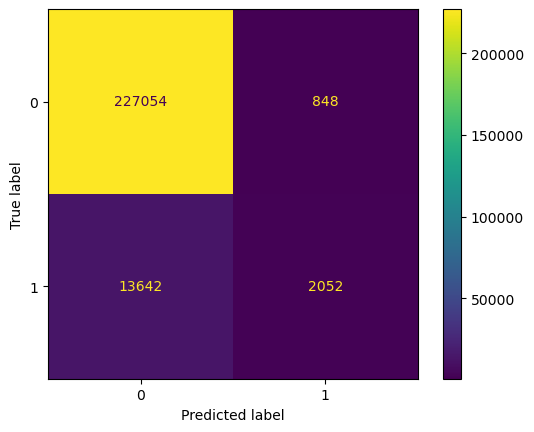

In [276]:
def calc_confusion_matrix(true_labels, pred_labels):
    num_labels = np.unique(true_labels).size
    cm = np.zeros((num_labels, num_labels), dtype=int)
    for a, p in zip(true_labels, pred_labels):
        cm[a,p] += 1
    return cm


y_test = np.asarray(y_test).astype(int)
y_pred = np.asarray(y_pred).astype(int)
titanic_cm = calc_confusion_matrix(y_test, y_pred)
print('Confusion Matrix for stream quality:\n', titanic_cm, '\n')
metrics.plot_confusion_matrix(pipe, X_test, y_test)

<span style='color:Blue ;
             font-size:20px;'>
    4)Outlier detection. Z-score Method  </span><br>

In [283]:
"""
Creating DataFrame without outliners
"""
def remove_outliers(train_df):
    non_cat_feats = train_df.select_dtypes(exclude=['object']).columns.tolist()
    non_cat_feats.remove('stream_quality')
    new_df = train_df.copy()
    for col in non_cat_feats:

        upper = new_df[col].mean() + 3*new_df[col].std()
        lower = new_df[col].mean() -3*new_df[col].std()
        
        new_df= new_df[(new_df[col]<upper) & (new_df[col]>lower)]
    
    return new_df

Train_df_Z = remove_outliers(Train_df)

#### Encode the data (If cathegorical features are exist)

In [284]:
encoded_data_Z = encoder.transform(Train_df_Z)

#### Select the target feature

In [285]:
X_train_Z = encoded_data_Z.drop(['stream_quality'],axis=1)
y_train_Z = encoded_data_Z['stream_quality']

#### Scale train  data

In [287]:
X_train_Z = pd.DataFrame(scaler.transform(X_train_Z), columns=X_train_Z.columns)

#### Train a logistic regression model for the detection of stream quality. And calculate Accuracy,Precision and Recall_score

In [289]:
pipe_Z = pipe
pipe_Z.fit(X_train_Z, y_train_Z)  # apply scaling on training data
y_pred_Z = pipe.predict(X_test)
Metrics_Df_Z = metrics_fun(pipe_Z,X_train_Z,X_test,y_train_Z,y_test)
Metrics_Df_Z.head(5)

,Train_set,Test_set
Accuracy,0.963038,0.907921
Precision,0.559896,0.341372
Recall_score,0.016382,0.461833


#### Create a confusion matrix

C:\Users\zakir\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


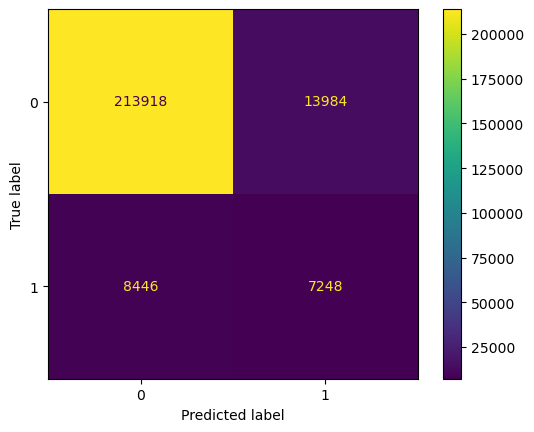

In [290]:
metrics.plot_confusion_matrix(pipe_Z, X_test, y_test)

<span style='color:Blue ;
             font-size:20px;'>
    5)Balancing the data. SMOTE Algorithm  </span><br>

#### Count a distribution of ones and zeros in dataset before and after implementation of algorithm

In [291]:
"""
Counting distribution of values in Train dataset
"""
print("Counts (1) in initial Stream_quality feature: {}".format(sum(y_train == 1)))  
print("Counts (0) in initial Stream_quality feature: {} \n".format(sum(y_train == 0)))  
sm1 = SMOTE(random_state = 2)  
X_train_smote, y_train_smote = sm1.fit_resample(X_train, y_train)
print('Shape of target feature after SMOTE: {}'.format(y_train_smote.shape)) 
print('Shape of other features dataset after SMOTE: {}\n'.format(X_train_smote.shape))  
print("Counts (1) in Stream_quality feature after SMOTE: {}".format(sum(y_train_smote == 1)))  
print("Counts (0) in Stream_quality feature after SMOTE: {}".format(sum(y_train_smote == 0)))  

Counts (1) in initial Stream_quality feature: 27834
Counts (0) in initial Stream_quality feature: 378738 

Shape of target feature after SMOTE: (757476,)
Shape of other features dataset after SMOTE: (757476, 11)

Counts (1) in Stream_quality feature after SMOTE: 378738
Counts (0) in Stream_quality feature after SMOTE: 378738


#### Prediction and metrics

In [293]:
pipe_smote = make_pipeline(StandardScaler(), clf)
pipe_smote.fit(X_train, y_train)  # apply scaling on training data
y_pred = pipe_smote.predict(X_test)
Metrics_Df_smote = metrics_fun(pipe_smote,X_train_smote,X_test,y_train_smote,y_test)
Metrics_Df_smote.head(5)

,Train_set,Test_set
Accuracy,0.616249,0.940516
Precision,0.985971,0.708017
Recall_score,0.235854,0.130559


#### Create a confusion matrix

C:\Users\zakir\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


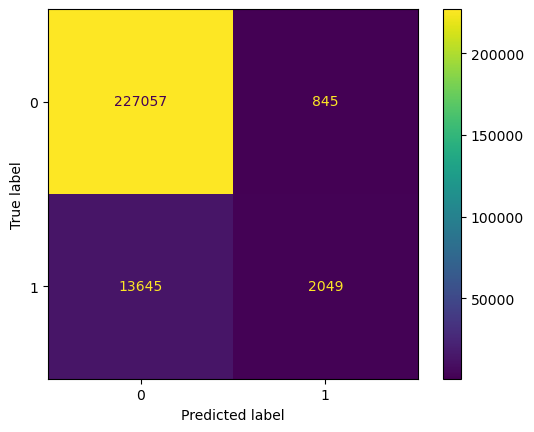

In [294]:
metrics.plot_confusion_matrix(pipe_smote, X_test, y_test)